<a href="https://colab.research.google.com/github/SiracencoSerghei/DataScienceHW/blob/main/example_kaggle/les_7/les_7_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from sys import path
# path = '/home/sergio/Desktop/DataScienceHW/example_kaggle/les_7'
path = '/content'

In [17]:
from google.colab import files
files.upload()
files.upload()
files.upload()

Saving movie_ids.txt to movie_ids (2).txt


Saving movieParams.mat to movieParams (1).mat


Saving movies.mat to movies (1).mat


{'movies (1).mat': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Feb 26 19:33:08 2025\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01IM\x0e\x00\x00\x00\xd0\x00\x00\x00\x06\x00\x00\x00\x08\x00\x00\x00\x0e\x00\x00\x00\x00\x00\x00\x00\x05\x00\x00\x00\x08\x00\x00\x00\x05\x00\x00\x00\x04\x00\x00\x00\x01\x00\x01\x00Y\x00\x00\x00\x0c\x00\x00\x00\xa0\x00\x00\x00\x05\x00\x00\x00\x00\x00\x00\x00\x03\x00\x00\x00\x00\x00\x00\x00\x04\x00\x00\x00\x00\x00\x00\x00\x03\x00\x00\x00\x00\x00\x00\x00\x03\x00\x00\x00\x00\x00\x00\x00\x04\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [28]:
import numpy as np
import pandas as pd

import os
import matplotlib.pyplot as plt
import matplotlib as matplotlib

from scipy import optimize
from scipy.io import loadmat


In [29]:
def normalizeRating(Y,R):
  m, n = Y.shape
  Ymean = np.zeros((m,1))
  Ynorm = np.zeros(Y.shape)

  for i in range(m):
    idx = R[i,:] == 1
    Ymean[i] = np.mean(Y[i,idx])
    Ynorm[i,idx] = Y[i,idx] - Ymean[i]

  return Ynorm, Ymean


def loadMovieList():
  with open(os.path.join(path, 'movie_ids.txt'), encoding='ISO-8859-1') as fid:
    movies = fid.readlines()

  movieNames = []
  for movie in movies:
    parts = movie.split()
    movieNames.append(' '.join(parts[1:]).strip())

  return movieNames

  def computeNumericalGradient(J, theta, e=1e-4):
    X_t = np.random.rand(4,3)
    Theta_t = np.random.rand(5,3)

    Y = np.dot(X_t, Theta_t.T)
    Y[np.random.rand(*Y.shape) > 0.5] = 0
    # Y[np.random.rand(*Y.shape) < 0.5] = 1
    R = np.zeros(Y.shape)
    R[Y != 0] = 1

    X = np.random.randn(*X_t.shape)
    Theta = np.random.randn(*Theta_t.shape)
    num_movies, num_users = Y.shape
    num_features = Theta_t.shape[1]

    params = np.concatenate([X.ravel(), Theta.ravel()])
    numgrad = computeNumericalGradient(lambda x: cofiCostFunc(x, Y, R, num_users, num_movies, num_features, lambda_), params)

    cost, grad = cofiCostFunc(params, Y, R, num_users, num_movies, num_features, lambda_)

    print(np.stack([numgrad, grad], axis=1))
    print('\nThe above two columns you get should be very similar.\n(Left-Your Numerical Gradient, Right-Analytical Gradient)')

    diff = np.linalg.norm(numgrad-grad)/np.linalg.norm(numgrad+grad)
    print('If your cost function implementation is correct, then the relative difference will be small (less than 1e-9)')
    print('Relative Difference: %g' % diff)



In [30]:
!pwd

/content


In [31]:
path

'/content'

In [32]:
names = loadMovieList()

In [33]:
print(len(names))
names[0]

5


'Toy Story (1995)'

Average rating for movie 1 (Toy Story): 4.500000 / 5


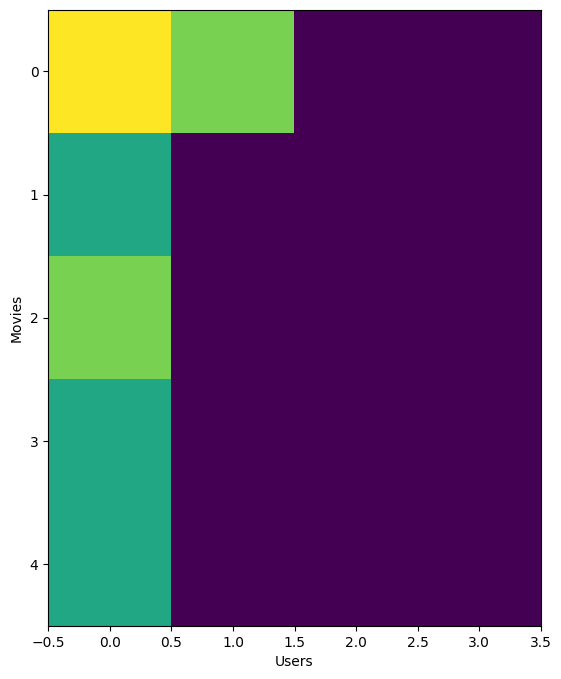

In [35]:
plt.figure(figsize=(10,8))
plt.imshow(Y)
plt.ylabel('Movies')
plt.xlabel('Users')
plt.show()